**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

**READING THE DATASET**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data set ML/Bengaluru_House_Data.xls')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [ ]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

**FILLING NULL VALUES**

In [ ]:
df['society'].fillna('information not available',inplace=True)
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,information not available,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,information not available,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,information not available,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
 df['bath']=df['bath'].fillna(df['bath'].median())
 df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,information not available,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,information not available,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,information not available,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
 df['balcony']=df['balcony'].fillna(df['balcony'].median())
 df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,information not available,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,information not available,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,information not available,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


DROPPING THE LOCATION NULL VALUES ROWS AND SIZE NULL VALUES ROWS

since it contains only small amount of null values

In [ ]:
df1=df.dropna()
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,information not available,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,information not available,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,information not available,3600,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


df1[~df1['total_sqft'].apply(is_float)].head(10)    #using negation we can get values which are not in float datatype


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,2.0,2.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,2.0,2.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2.0,0.0,56.800
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,2.0,2.0,74.820
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,information not available,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,18-Sep,Hennur Road,2 BHK,Shxorm,1195 - 1440,2.0,0.0,63.770


**CONVERTING VALUES INTO FLOAT**

In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:

        return None

In [ ]:
df2=df1.copy()

In [ ]:
df2.total_sqft = df2.total_sqft.apply(convert_sqft_to_num)

In [ ]:
df2

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,information not available,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,information not available,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,information not available,3600.0,5.0,2.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:
df2['bhk'] = df2['size'].apply(lambda x : int(x.split()[0]))
df2

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,information not available,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,information not available,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,information not available,3600.0,5.0,2.0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,4


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13303 non-null  object 
 1   availability  13303 non-null  object 
 2   location      13303 non-null  object 
 3   size          13303 non-null  object 
 4   society       13303 non-null  object 
 5   total_sqft    13257 non-null  float64
 6   bath          13303 non-null  float64
 7   balcony       13303 non-null  float64
 8   price         13303 non-null  float64
 9   bhk           13303 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
df3=df2.copy()

**FEATURE ENGINEERING**

In [ ]:
df3['price_per_sqr'] = round(df3['price'] * 100000 / df3['total_sqft'],2)
df3

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,information not available,1440.0,2.0,3.0,62.00,3,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.89
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,information not available,1200.0,2.0,1.0,51.00,2,4250.00
...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5,6689.83
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,information not available,3600.0,5.0,2.0,400.00,4,11111.11
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2,5258.55
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,4,10407.34


In [ ]:
#since location is important in case of housing price prediction we will convert the location string values into numericals.

x=df3['location'].value_counts()
x

Whitefield           539
Sarjapur  Road       397
Electronic City      302
Kanakpura Road       273
Thanisandra          234
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

here we are reducing dimensions by taking datas that have less than 10 points into single category.

In [ ]:
below_10 = x[x <= 10]
below_10

Dairy Circle         10
Kalkere              10
Dodsworth Layout     10
Sadashiva Nagar      10
Naganathapura        10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: location, Length: 1063, dtype: int64

In [ ]:
df3['location'] = df3['location'].apply(lambda x : 'Others' if x in below_10 else x)
df3

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,information not available,1440.0,2.0,3.0,62.00,3,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.89
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,information not available,1200.0,2.0,1.0,51.00,2,4250.00
...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,5,6689.83
13316,Super built-up Area,Ready To Move,Others,4 BHK,information not available,3600.0,5.0,2.0,400.00,4,11111.11
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,2,5258.55
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,4,10407.34


In [ ]:
df3['location'].value_counts()

Others                2897
Whitefield             539
Sarjapur  Road         397
Electronic City        302
Kanakpura Road         273
                      ... 
Marsur                  11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

OUTLIERS

finding and removing

In [ ]:
#The typical Threshold value for a bedroom is 300-350 squarefeet.
df3[df3.total_sqft/df3.bhk < 300]
print(df3.shape)
df3.head()

(13303, 11)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,information not available,1440.0,2.0,3.0,62.00,3,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.89
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,information not available,1200.0,2.0,1.0,51.00,2,4250.00


In [ ]:
df4 = df3[~(df3['total_sqft']/df3['bhk'] < 300)]
print(df4.shape)
df4.head()

(12559, 11)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,information not available,1440.0,2.0,3.0,62.00,3,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3,6245.89
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,information not available,1200.0,2.0,1.0,51.00,2,4250.00


In [ ]:
df4['price_per_sqr'].describe()

count     12513.000000
mean       6307.441655
std        4160.931637
min         267.830000
25%        4210.530000
50%        5295.010000
75%        6916.670000
max      176470.590000
Name: price_per_sqr, dtype: float64

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqr)     #m--> mean
        st = np.std(subdf.price_per_sqr)     #std --> standard deviation
        reduced_df = subdf[(subdf.price_per_sqr>(m-st)) & (subdf.price_per_sqr<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(10289, 11)

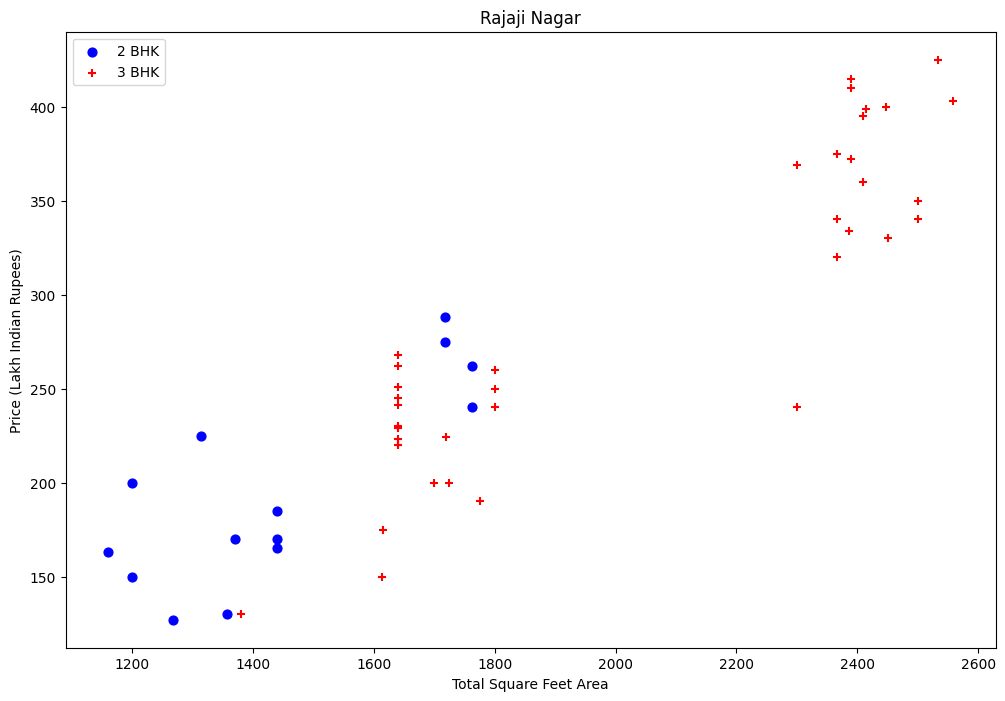

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    fig = plt.figure(figsize=(12,8))
    fig, plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=40)
    fig, plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='red',label='3 BHK', s=40)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df5,"Rajaji Nagar")

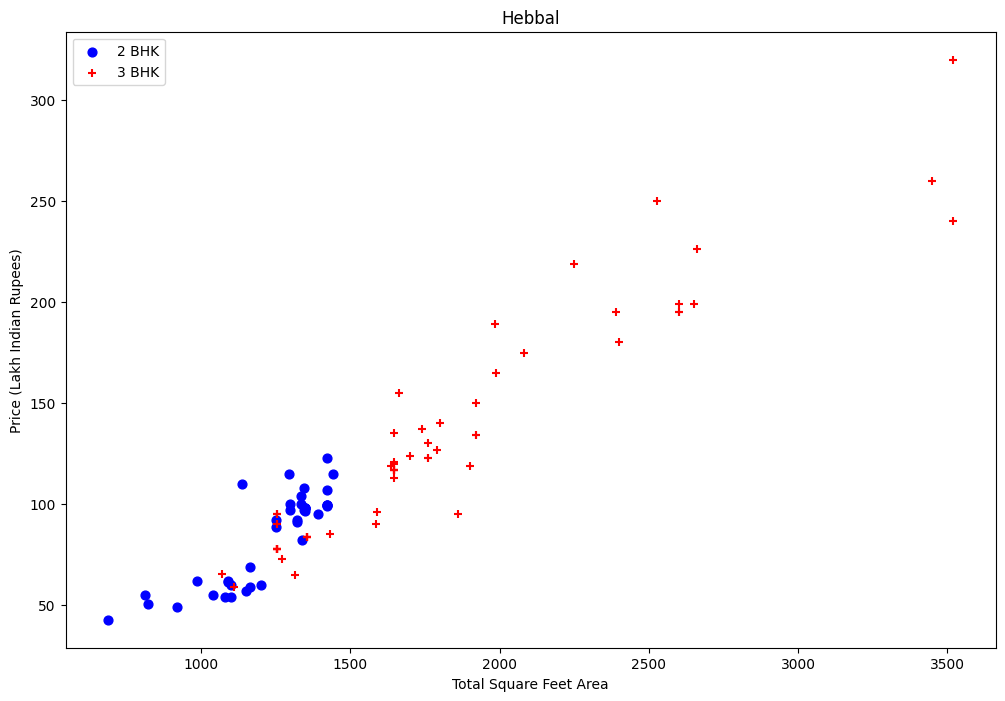

In [ ]:
plot_scatter_chart(df5,"Hebbal")

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqr),
                'std': np.std(bhk_df.price_per_sqr),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqr<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape


(7365, 11)

Text(0.5, 0.98, 'VS')

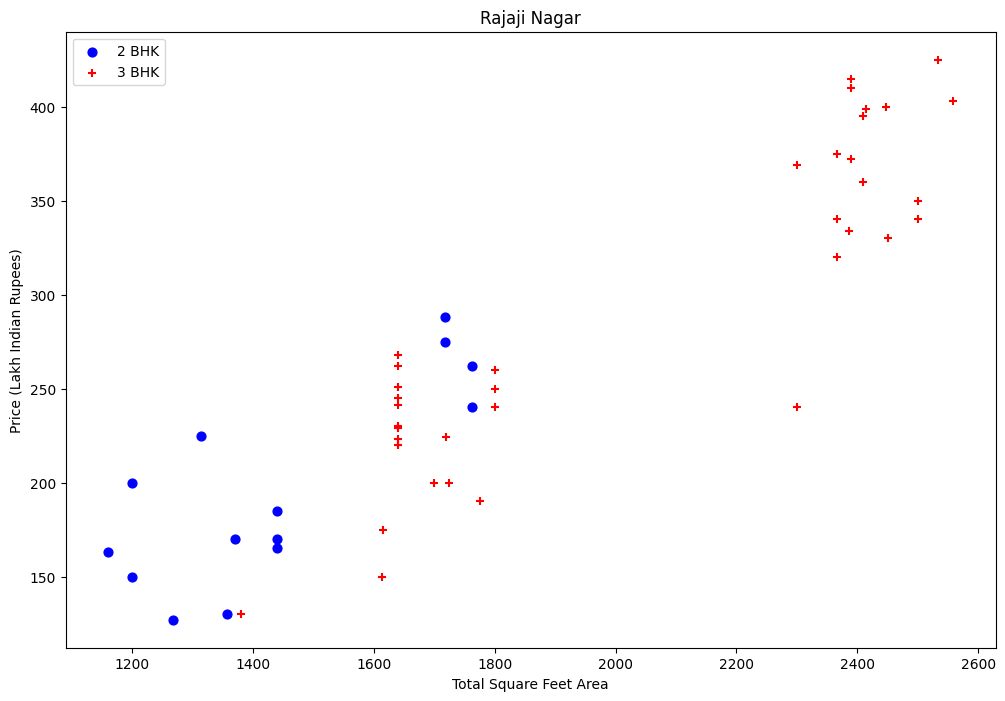

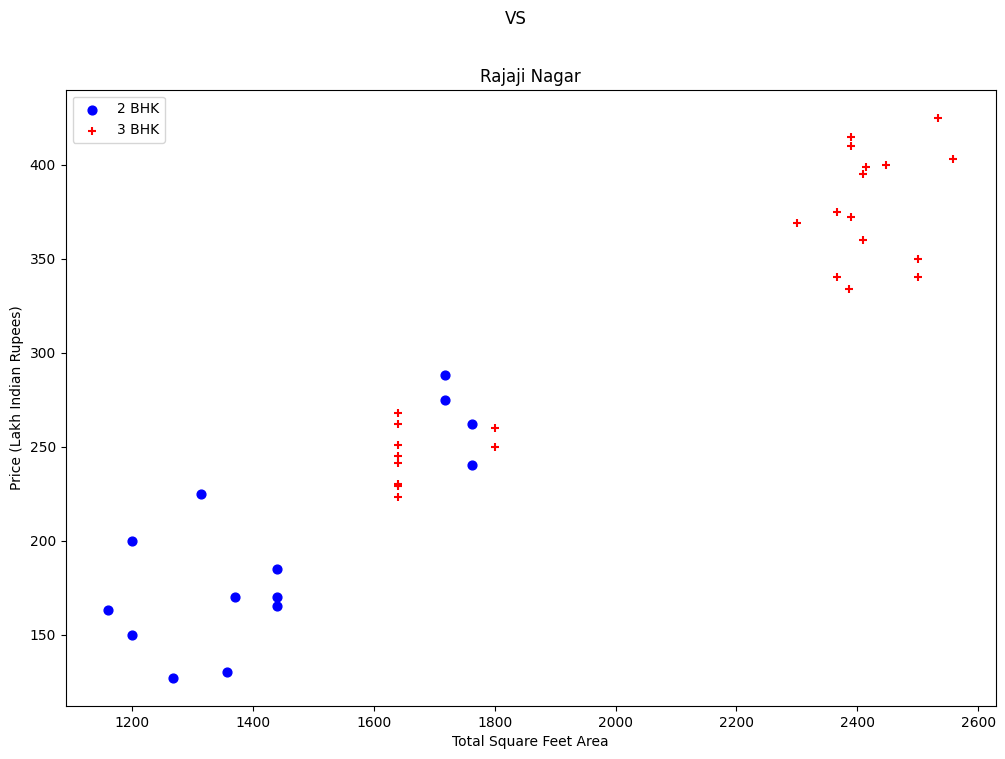

In [ ]:
plot_scatter_chart(df5,'Rajaji Nagar')
plot_scatter_chart(df6,'Rajaji Nagar')
plt.suptitle( 'VS')

Text(0.5, 1.0, 'Price per square feet Distribution')

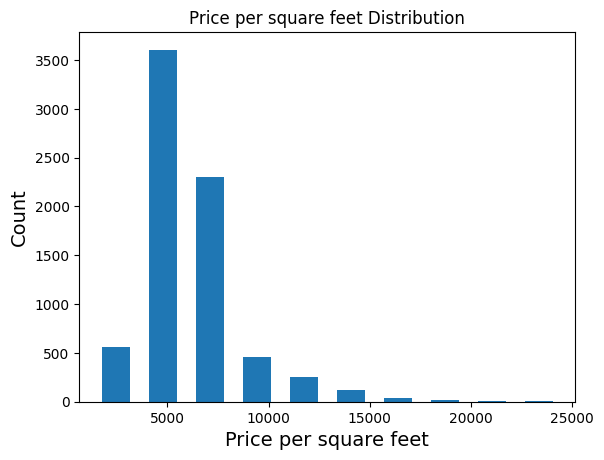

In [ ]:
plt.hist(df6['price_per_sqr'],rwidth=0.6)
plt.xlabel('Price per square feet',size=14)
plt.ylabel('Count',size=14)
plt.title('Price per square feet Distribution')

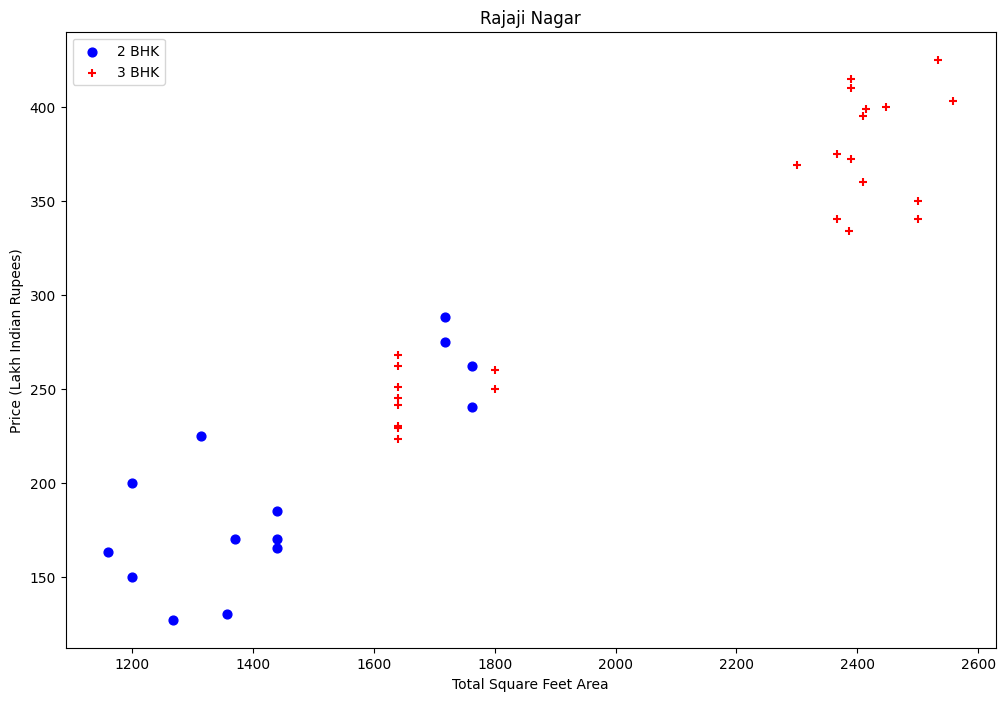

In [ ]:
plot_scatter_chart(df6,"Rajaji Nagar")

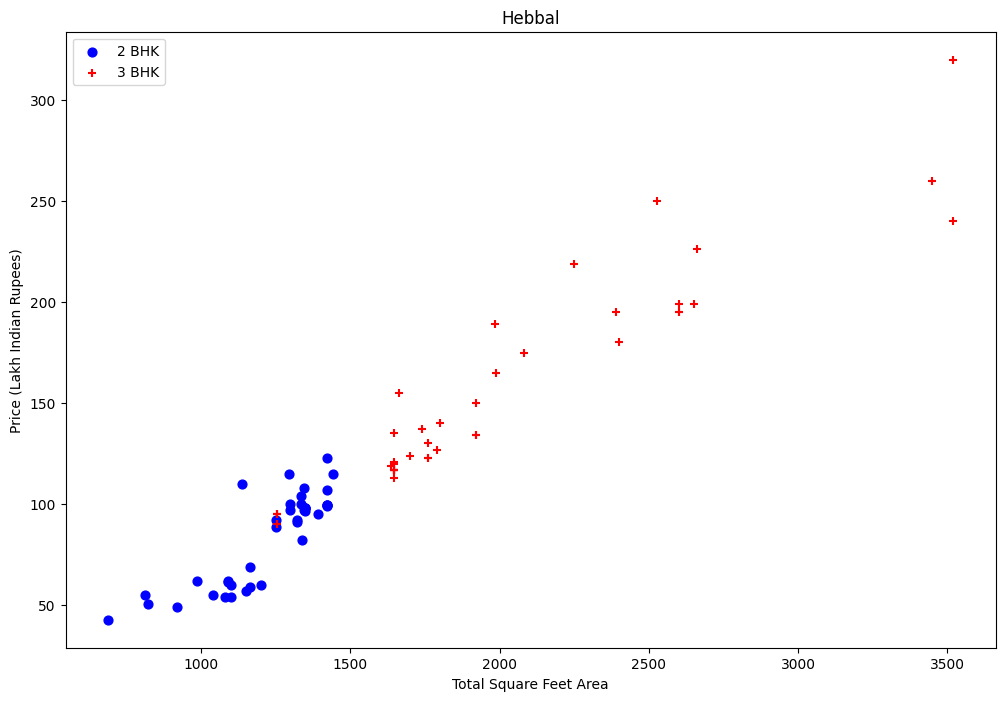

In [ ]:
plot_scatter_chart(df6,"Hebbal")

In [ ]:
df6['bath'].unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df6[df6['bath']>10]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
5300,Super built-up Area,Ready To Move,Neeladri Nagar,10 BHK,information not available,4000.0,12.0,2.0,160.0,10,4000.00
5953,Super built-up Area,Ready To Move,Others,10 BHK,information not available,12000.0,12.0,2.0,525.0,10,4375.00
6042,Super built-up Area,Ready To Move,Others,16 BHK,information not available,10000.0,16.0,2.0,550.0,16,5500.00
6781,Super built-up Area,Ready To Move,Others,11 BHK,information not available,6000.0,12.0,2.0,150.0,11,2500.00
7113,Super built-up Area,Ready To Move,Others,13 BHK,information not available,5425.0,13.0,0.0,275.0,13,5069.12


Text(0, 0.5, 'Counts')

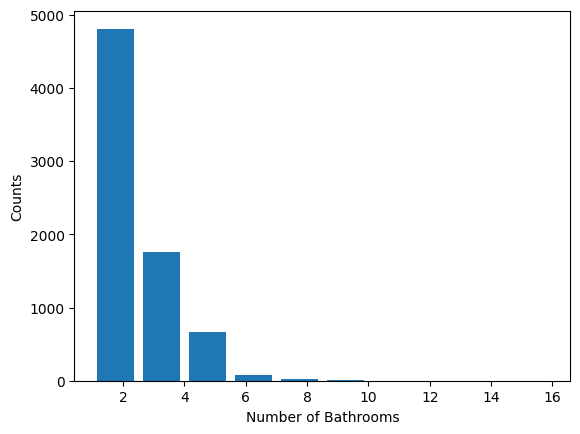

In [ ]:
plt.hist(df6['bath'],rwidth=.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Counts')


<Axes: >

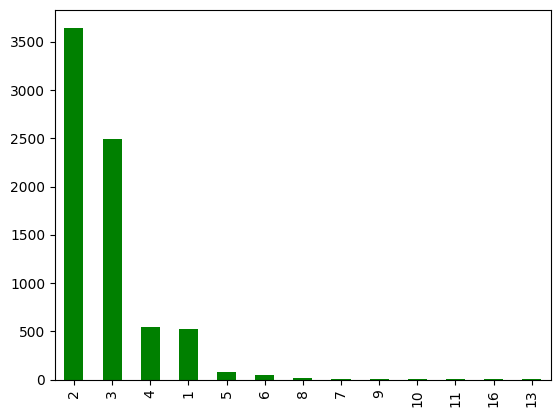

In [ ]:
bhk_plot=df6['bhk'].value_counts()
bhk_plot.plot(kind='bar',color='green')

In [ ]:
df7 = df6[df6['bath'] < df6['bhk']+3 ]
df7

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
1,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,Clntsrt,1250.0,2.0,2.0,40.0,2,3200.00
2,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,information not available,1200.0,2.0,2.0,83.0,2,6916.67
3,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,information not available,1170.0,2.0,2.0,40.0,2,3418.80
4,Super built-up Area,Ready To Move,Devarachikkanahalli,3 BHK,Shireru,1425.0,2.0,2.0,65.0,3,4561.40
5,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,information not available,947.0,2.0,2.0,43.0,2,4540.65
...,...,...,...,...,...,...,...,...,...,...,...
10278,Super built-up Area,Ready To Move,Yeshwanthpur,2 BHK,Vatra N,1195.0,2.0,2.0,100.0,2,8368.20
10279,Super built-up Area,18-Aug,Yeshwanthpur,3 BHK,Aroomba,1692.0,3.0,3.0,108.0,3,6382.98
10281,Built-up Area,Ready To Move,Yeshwanthpur,6 Bedroom,information not available,2500.0,5.0,2.0,185.0,6,7400.00
10286,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,Goandn,1855.0,3.0,3.0,135.0,3,7277.63


In [ ]:
df8=df7.drop(['area_type','availability','size','society','price_per_sqr'],axis=1)
df8

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2
...,...,...,...,...,...,...
10278,Yeshwanthpur,1195.0,2.0,2.0,100.0,2
10279,Yeshwanthpur,1692.0,3.0,3.0,108.0,3
10281,Yeshwanthpur,2500.0,5.0,2.0,185.0,6
10286,Yeshwanthpur,1855.0,3.0,3.0,135.0,3


In [ ]:
df9=pd.get_dummies(df8[['location']],drop_first=True)
df9

,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10286,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df10=pd.concat([df8,df9],axis=1)
df10

,location,total_sqft,bath,balcony,price,bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10278,Yeshwanthpur,1195.0,2.0,2.0,100.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10279,Yeshwanthpur,1692.0,3.0,3.0,108.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,Yeshwanthpur,2500.0,5.0,2.0,185.0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10286,Yeshwanthpur,1855.0,3.0,3.0,135.0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df11=df10.drop(['location'],axis=1)
df11

,total_sqft,bath,balcony,price,bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10278,1195.0,2.0,2.0,100.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10279,1692.0,3.0,3.0,108.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,2500.0,5.0,2.0,185.0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10286,1855.0,3.0,3.0,135.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x=df11.drop(['price'],axis=1)
x

,total_sqft,bath,balcony,bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
1,1250.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10278,1195.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10279,1692.0,3.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,2500.0,5.0,2.0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10286,1855.0,3.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=df11['price']
y

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10278    100.0
10279    108.0
10281    185.0
10286    135.0
10287    160.0
Name: price, Length: 7361, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,total_sqft,bath,balcony,bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
6470,1191.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8633,702.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8019,1295.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4926,2006.0,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6641,1080.0,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6946,2250.0,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7010,1719.0,3.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7346,950.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,1200.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test

,total_sqft,bath,balcony,bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
4316,1100.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2384,1870.0,3.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2932,2280.0,5.0,2.0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5881,1170.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2025,1210.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5786,1340.0,2.0,1.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8999,760.0,1.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4774,1724.0,3.0,1.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6746,925.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train

6470      90.0
8633      35.8
8019      43.9
4926     297.0
6641     149.0
         ...  
6946     180.0
7010     110.0
7346      57.0
1004      85.0
10137     92.0
Name: price, Length: 5152, dtype: float64

In [ ]:
y_test

4316     68.0
2384    180.0
2932    200.0
5881     68.0
2025     54.0
        ...  
5786    100.0
8999     50.0
4774    146.0
6746     70.0
5911     17.0
Name: price, Length: 2209, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 60.87576246, 200.43919301, 217.5538212 , ..., 132.37010405,
        77.20523122,  48.87242269])

In [ ]:
y_test.values

array([ 68., 180., 200., ..., 146.,  70.,  17.])

In [ ]:
model.score(x_test,y_test)

0.806995310057881

FINDING THE BEST MODEL

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor

def best_model(X,Y):
  algorithm = {
      'Linear Regression' : {
          'model' : LinearRegression(),
          'parameter' :{
              'copy_X':[True,False],
              'fit_intercept':[True,False]
          }
      },
      'Decision Tree Regressor' :{
          'model': DecisionTreeRegressor(),
          'parameter':{
              'criterion':['poisson','friedman_mse','squared_error','absolute_error'],
              'splitter':['best','random']
        }
      }
  }
  score=[]
  cv = ShuffleSplit(n_splits = 5,test_size=0.3,random_state=42)
  for name,config in algorithm.items():
    GS = GridSearchCV(config['model'],config['parameter'],cv=cv,return_train_score=False)
    GS.fit(x,y)
    score.append({
        'Model':name,
        'Score':GS.best_score_,
        'Parameter':GS.best_params_
       })
  return pd.DataFrame(score,columns=['Model','Score','Parameter'])

best_model(x,y)

,Model,Score,Parameter
0,Linear Regression,0.831258,"{'copy_X': True, 'fit_intercept': True}"
1,Decision Tree Regressor,0.723602,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
def price_prediction(location,total_sqrfeet,bath,bhk,balcony):
  loc_pos = np.where(x.columns==location)[0][0]
  X=np.zeros(len(x.columns))
  X[0] = total_sqrfeet
  X[1] = bath
  X[2] = bhk
  X[3] = balcony
  if loc_pos >= 0:
    X[loc_pos]=1
  return model.predict([X])[0]

In [ ]:
price_prediction('location_1st Phase JP Nagar',1200,3,3,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


117.94529924818403

In [ ]:
price_prediction('location_1st Phase JP Nagar',1200,1,2,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


104.65680223390723

In [ ]:
price_prediction('location_Vishwapriya Layout',1200,1,2,1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.072507209836544

<Axes: >

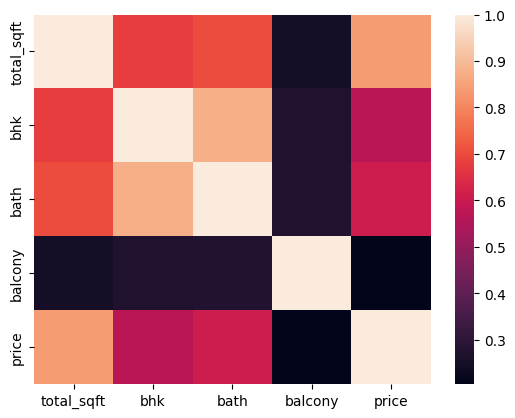

In [ ]:
new_dataset=df10[['total_sqft','bhk','bath','balcony','price']]
sns.heatmap(new_dataset.corr())

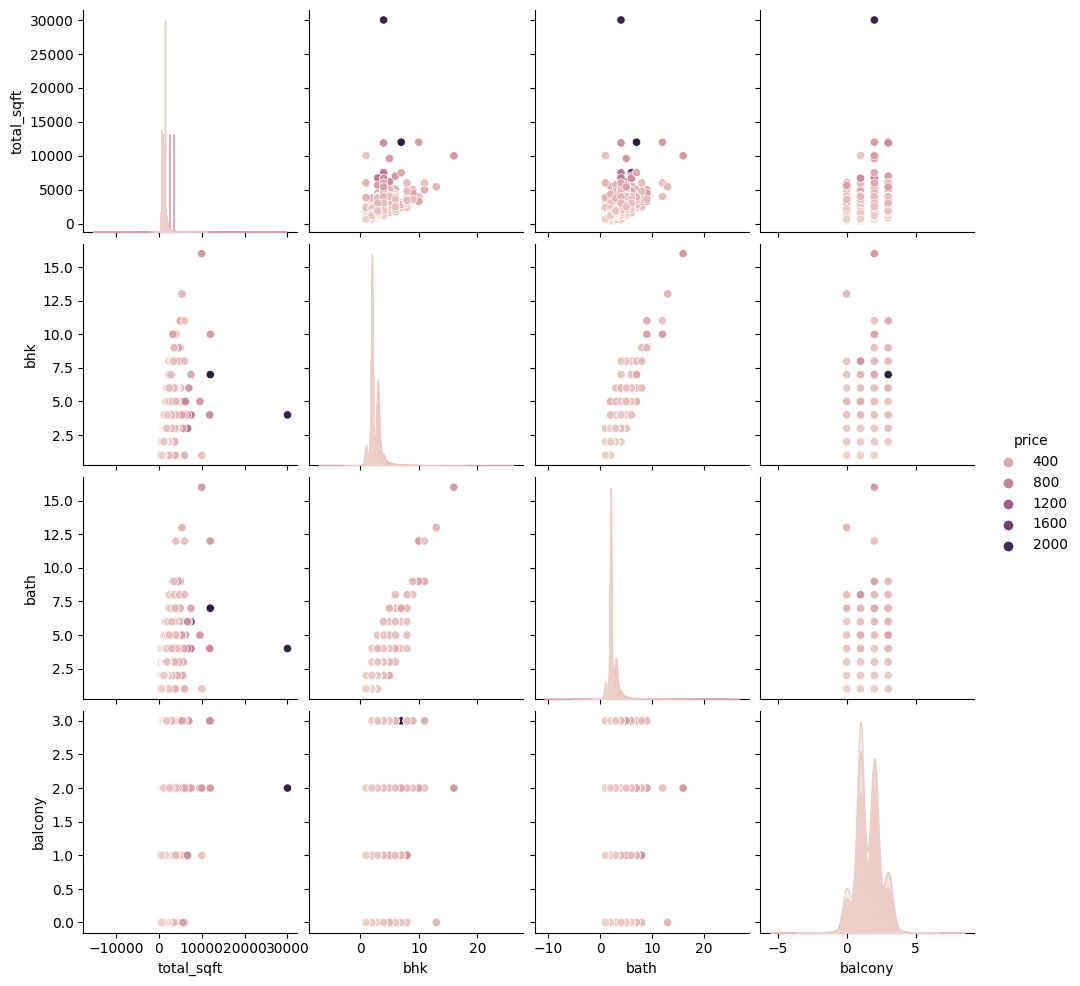

In [ ]:
sns.pairplot(new_dataset,hue='price')

In [ ]:
new_data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
new_data

,Actual,Predicted
4316,68.0,60.875762
2384,180.0,200.439193
2932,200.0,217.553821
5881,68.0,95.567275
2025,54.0,64.904202
...,...,...
5786,100.0,106.187828
8999,50.0,31.720500
4774,146.0,132.370104
6746,70.0,77.205231


In [ ]:
print('The slope of:',list(zip(x,model.coef_)))

The slope of: [('total_sqft', 0.07494711884073668), ('bath', 6.827180364466356), ('balcony', -0.36586371465591583), ('bhk', -2.4863217459190707), ('location_1st Block Jayanagar', 175.70832590467091), ('location_1st Phase JP Nagar', 52.85524810348241), ('location_2nd Phase Judicial Layout', -14.940203586615752), ('location_2nd Stage Nagarbhavi', 167.83037430908695), ('location_5th Block Hbr Layout', -55.39372201751199), ('location_5th Phase JP Nagar', 1.347759270887508), ('location_6th Phase JP Nagar', 25.667026873965177), ('location_7th Phase JP Nagar', 24.10817142043515), ('location_8th Phase JP Nagar', -4.760171471193729), ('location_9th Phase JP Nagar', -1.1735849687762965), ('location_AECS Layout', 4.415460149621467), ('location_Abbigere', -20.540645308278243), ('location_Akshaya Nagar', -0.5300761508445504), ('location_Ambalipura', 14.796186058466922), ('location_Ambedkar Nagar', 14.784575654721765), ('location_Amruthahalli', 7.4711485272357905), ('location_Anandapura', -2.7349168

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
print("MEan Absolute Error",mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error',mean_absolute_percentage_error(y_test,y_pred))

MEan Absolute Error 18.589076714086303
Mean Absolute Percentage Error 0.20764300799213908


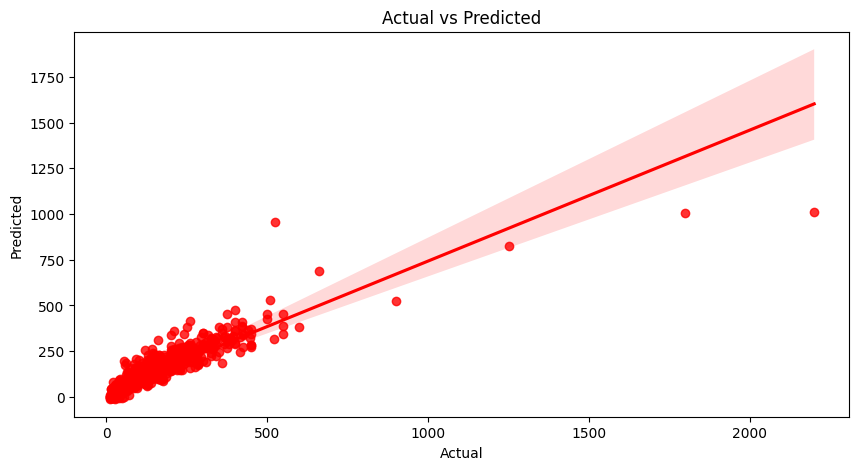

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(data=new_data,x='Actual',y='Predicted',color='red')
plt.title('Actual vs Predicted')
plt.show()